In [30]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cmocean  # Optional for better ocean colormaps

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import shapely.geometry as sgeom
import cartopy
import cmocean
from matplotlib.patches import Circle
from matplotlib.path import Path
import matplotlib.patheffects as PathEffects
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as ShapelyPolygon
import numpy as np
import matplotlib.path as mpath

In [35]:
path = '../data/copernicus/cmems_mod_arc_phy_my_topaz4_P1M/cmems_mod_arc_phy_my_topaz4_P1M_multi-vars_180.00W-179.88E_50.00N-90.00N_0.00-4000.00m_2015-01-01-2016-12-01.nc'

In [36]:
ds = xr.open_dataset(path, engine='netcdf4')

In [37]:
# print unique time values for the ds xr dataset
print(np.unique(ds.time.values))


['2015-01-01T00:00:00.000000000' '2015-02-01T00:00:00.000000000'
 '2015-03-01T00:00:00.000000000' '2015-04-01T00:00:00.000000000'
 '2015-05-01T00:00:00.000000000' '2015-06-01T00:00:00.000000000'
 '2015-07-01T00:00:00.000000000' '2015-08-01T00:00:00.000000000'
 '2015-09-01T00:00:00.000000000' '2015-10-01T00:00:00.000000000'
 '2015-11-01T00:00:00.000000000' '2015-12-01T00:00:00.000000000'
 '2016-01-01T00:00:00.000000000' '2016-02-01T00:00:00.000000000'
 '2016-03-01T00:00:00.000000000' '2016-04-01T00:00:00.000000000'
 '2016-05-01T00:00:00.000000000' '2016-06-01T00:00:00.000000000'
 '2016-07-01T00:00:00.000000000' '2016-08-01T00:00:00.000000000'
 '2016-09-01T00:00:00.000000000' '2016-10-01T00:00:00.000000000'
 '2016-11-01T00:00:00.000000000' '2016-12-01T00:00:00.000000000']


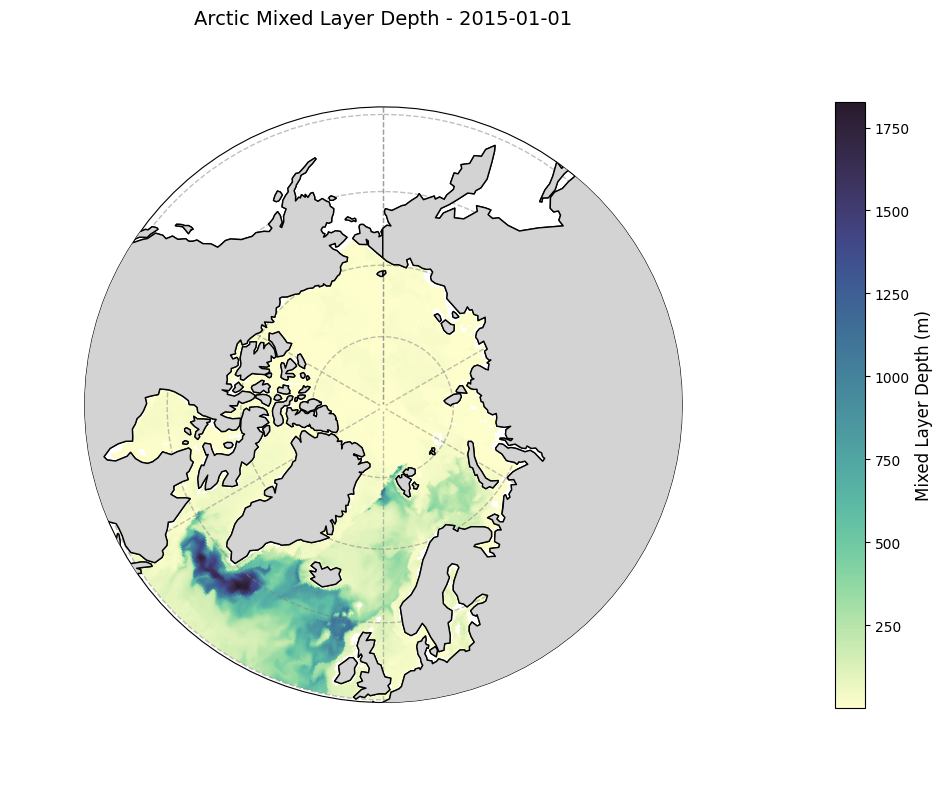

In [34]:

# Create a circular boundary path
def make_circular_boundary():
    theta = np.linspace(0, 2 * np.pi, 100)
    center = [0.5, 0.5]
    radius = 0.4
    verts = np.vstack([np.cos(theta), np.sin(theta)]).T * radius + center
    return mpath.Path(verts)

# Create a figure with polar stereographic projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))

# Set circular boundary
ax.set_boundary(make_circular_boundary(), transform=ax.transAxes)

# Set the extent to focus on the Arctic region
ax.set_extent([-180, 180, 40, 90], crs=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
gl = ax.gridlines(draw_labels=False, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cfeature.LAND, zorder=100, edgecolor='k', facecolor='lightgray')

# Plot the data (mixed layer depth for the first time step and surface level)
data = ds.isel(time=0).isel(depth=0)['mlotst']
im = data.plot(ax=ax, transform=ccrs.PlateCarree(), 
              cmap=cmocean.cm.deep,
              add_colorbar=False)

# Add a colorbar
cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.08)
cbar.set_label('Mixed Layer Depth (m)', fontsize=12)

# Add title
try:
    time_str = str(ds.time.values[0])
    if len(time_str) > 10:
        time_str = time_str[:10]
    plt.title(f'Arctic Mixed Layer Depth - {time_str}', fontsize=14)
except:
    plt.title('Arctic Mixed Layer Depth', fontsize=14)

plt.tight_layout()
plt.show()
